# TP 5 Réseaux de neurones - Multi classification et Propagation en avant
### Groupe 3:
- Adda Redouane 
- Rahiche Messaoud 
- Krizou Amani 
- Mendil Yousra

# Importation des librairies necessaires au travail

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import cv2 

# Lecture des fichiers de données

In [15]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)

In [16]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,:-1]))
y=data[:,-1]
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)

In [17]:
print('X', X.shape ,' y ', y.shape)

X (5000, 401)  y  (5000, 1)


Visualisation aléatoire de quelques données

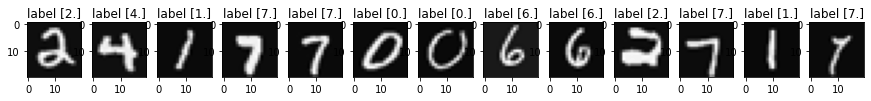

In [18]:
plt.figure(figsize=(15,8))
for i in range(13):
    c = random.randint(X.shape[0])
    a = X[c,1:].reshape((20, 20))
    a=np.transpose(a)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(y[c]))
    plt.imshow(a,cmap='gray')

# Partie 1, régression logistique

La fonction Sigmoid

In [19]:
def Sigmoid(z):
    return 1/(1+np.exp(-z))

La fonction d'hypothese

In [20]:
def h(X,theta):
    return Sigmoid(np.dot(X,theta))

In [21]:
def normalize(X):
    mean = np.mean(X, axis = 1, keepdims = True)
    std = np.std(X, axis = 1, keepdims = True)
    data_normalized = (X-mean)/std
    return data_normalized

La fonction de cout

In [22]:
def lrCostFunction (X, y, theta, alpha, MaxIter,lambda_):
    m = len(y)
    cost_hist = np.zeros(MaxIter)
    
    for i in range(MaxIter):
        predictions = Sigmoid(X @ theta)
        error = (-y*np.log(predictions)) - ((1-y)*np.log(1-predictions))
        cost = 1/m * sum(error)
        regCost = cost + lambda_/(2*m) * sum(theta**2)
        j_0 = 1/m * (X.transpose() @ (predictions - y))[0]
        j_1 = 1/m * (X.transpose() @ (predictions - y))[1:] + (lambda_/m) * theta[1:]
        grad = np.vstack((j_0[:,np.newaxis], j_1))
        
        theta = theta - (alpha * grad)
        cost_hist[i] = regCost
    return theta

In [44]:
def predictOneveVsAll (all_theta, X):
    y_pred = Sigmoid(np.dot(X,all_theta.T))
    # print(y_pred.shape)
    class_pred = np.argmax(y_pred, axis=1)
    return class_pred

In [24]:
classes= np.unique(y)
number_classes=classes.shape[0]
all_theta = np.zeros((number_classes, X.shape[1]))

In [25]:
MaxIter= 1000
lambda_= 0.1
alpha = 0.01
# initial_theta pour chaque classifieur
initial_theta=np.zeros((X.shape[1], 1));
for i in range (number_classes):
     # appel pour chaque classifieur
     theta = lrCostFunction(X,(y==classes[i]).astype(int),initial_theta,alpha, MaxIter,lambda_)
     all_theta[i,:]=theta.reshape(theta.shape[0],)
# print(all_theta);                   

In [43]:
y_pred = predictOneveVsAll(all_theta, X);

(5000, 10)


# Qualité du classifieur RL

la valeur predit est: 9 , et la valeur actuel de l'image est: 9


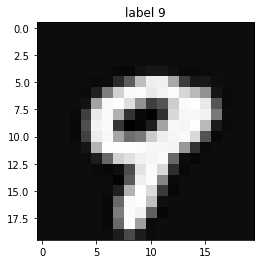

In [27]:
c = random.randint(X.shape[0])
a = X[c,1:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(y_pred[c]))
plt.imshow(a,cmap='gray')
print(f"la valeur predit est: {y_pred[c]} , et la valeur actuel de l'image est: {int(y[c][0])}")

In [28]:
precision = np.mean(y==y_pred.reshape(-1,1))*100
print(f"Precision : {precision}%")


Precision : 84.14%


# Partie 2: Réseaux de neurones
- une couche d'entrée avec 400 noeuds (20 x 20 pixels) + le biais
- une couche cachée avec 25 noeuds
- une couche de sortie avec 10 noeuds (nombre de classes)

In [29]:
# poids de la couche 1
W1 = np.genfromtxt('W1.csv', delimiter=',', dtype=float)
W1.shape


(25, 401)

In [30]:
# poids de la couche 2
W2 = np.genfromtxt('W2.csv', delimiter=',', dtype=float)
W2.shape

(10, 26)

In [31]:
input_layer_size  = 400;  
hidden_layer_size = 25;   
num_labels = 10;

In [32]:
def predict (W1, W2, X):
    z1 = np.dot(X, W1.T)
    a1 = Sigmoid(z1)

    bias=np.ones((a1.shape[0],1))
    a1= np.append(a1,bias,axis=1)

    z2 = np.dot(a1,W2.T)
    y_pred = Sigmoid(z2)
    return y_pred

In [33]:
y_pred=predict(W1, W2,X)
class_pred_FFRN = np.argmax(y_pred, axis=1)
precision_RN = np.mean(y==class_pred_FFRN.reshape(-1,1))*100
print(f"Precision : {precision_RN}%")

Precision : 22.28%


la valeur predit est: 4 , et la valeur actuel de l'image est: 4


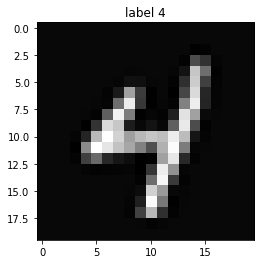

In [34]:

c = random.randint(X.shape[0])
a = X[c,1:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(class_pred_FFRN[c]))
plt.imshow(a,cmap='gray')
print(f"la valeur predit est: {class_pred_FFRN[c]} , et la valeur actuel de l'image est: {int(y[c][0])}")

In [35]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier().fit(X, y)
y_predict_proba = model.predict_proba(X)

C:\Users\user\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
class_pred_sclr = np.argmax(y_predict_proba, axis=1)
precision_SC = np.mean(y==class_pred_sclr.reshape(-1,1))*100
print(f"Precision : {precision_SC}%")

Precision : 100.0%


la valeur predit est: 1 , et la valeur actuel de l'image est: 1


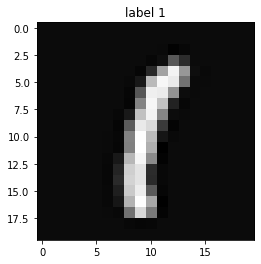

In [37]:
c = random.randint(X.shape[0])
a = X[c,1:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(class_pred_FFRN[c]))
plt.imshow(a,cmap='gray')
print(f"la valeur predit est: {class_pred_FFRN[c]} , et la valeur actuel de l'image est: {int(y[c][0])}")

# Comparaison entre les precision

In [38]:
print(f'''Presision regression logistique : {precision} %
Precision Reseau de neuron avec FEED FORWARD : {precision_RN} %
Precision Reseau de neuron avec scikit learn : {precision_SC} %
''')

Presision regression logistique : 84.14 %
Precision Reseau de neuron avec FEED FORWARD : 22.28 %
Precision Reseau de neuron avec scikit learn : 100.0 %

